# 2.(Classification Problem)
## Heart Failure Prediction Dataset
### kaynakça -	https://www.kaggle.com/fedesoriano/heart-failure-prediction

## 2.1 kütüphanelerin çağırılması ve Datasetinin okunması 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
dt = pd.read_csv('heart.csv')
print(dt)


     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [2]:
print("------------------------------------Verisetinin üst kısmı-------------------------------------------------")

print(dt.head())

------------------------------------Verisetinin üst kısmı-------------------------------------------------
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [3]:
print("------------------------------------Verisetinin Alt kısmı-------------------------------------------------")
print(dt.tail())

------------------------------------Verisetinin Alt kısmı-------------------------------------------------
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  


## 2.2 Genel Bakış



In [4]:
print(dt.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [6]:
print("=======Sutünler istatistikleri=======")
print(dt.describe())

=======Sutünler istatistikleri=======
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


## 2.3 Verisetinin Sütun Bilgileri 

#### Age: Hastanın yaşı [yıl]

#### Sex: Hastanın cinsiyeti [E: Erkek, K: Kadın]

#### ChestPainType: Göğüs ağrısı tipi [TA: Tipik Angina, ATA: Atipik Angina, NAP: Anjinal Olmayan Ağrı, ASY: Asemptomatik] 

#### RestingBP: Dinlenme kan basıncı [mm Hg] 

#### Cholesterol: Serum kolesterolü [mm/dl]

#### FastingBS:  Açlık kan şekeri i [1: Fasting BS > 120 mg/dl ise,     0: aksi halde]

#### RestingECG:istirahat elektrokardiyogram sonuçları [Normal: Normal, ST: ST-T dalga anormalliği olan, LVH: (Sol Ventriküler Hipertrofi)

#### MaxHR: Ulaşılan maksimum kalp hızı [60 ile 202 arasındaki sayısal değer]

#### ExerciseAngina: Egzersize bağlı angina [Y: Evet, N: Hayır]

#### Oldpeak: ST [Depresyonda ölçülen sayısal değer]

#### ST_Slope: Zirve egzersiz ST segmentinin eğimi [up: Yukarı eğimli, flat: düz, down: aşağı eğimli] 

#### HeartDisease: Hedef sınıfı [1: kalp hastalığı, 0: Normal]

## 2.4  Tanımlar 

#### 2.4.1    ST Segmenti ventriküler depolarizasyon ve repolarizasyon arasındaki aralığı temsil eder. ST segment anormalliğinin (yükseklik veya depresyon) en önemli nedeni miyokard iskemisi veya enfarktüsüdür. 
#### ST Depresyonu aşağıdaki figürde gösterilmiştir.

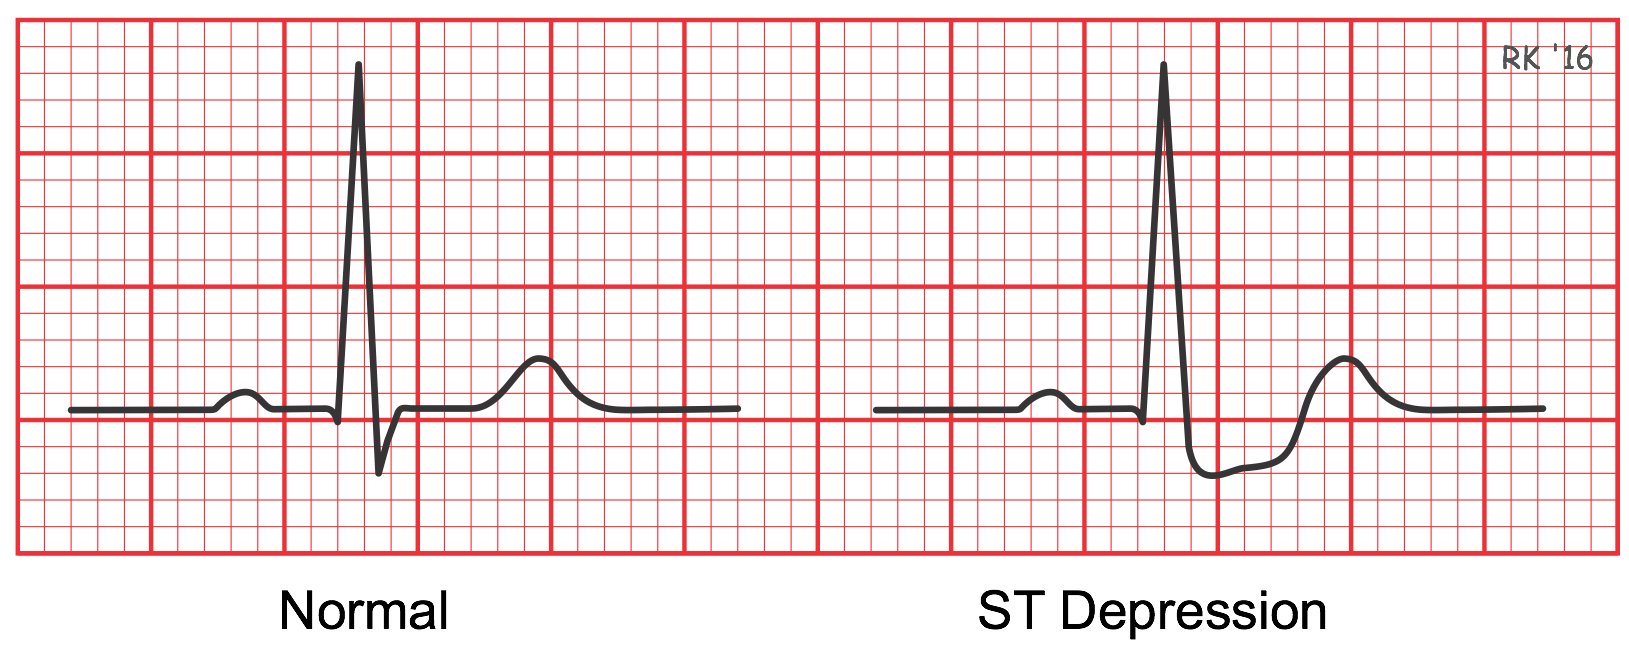

In [7]:
print("-------------------------------------------------------------------------------------")

-------------------------------------------------------------------------------------


#### 2.4.2  Left Ventricular hypertrophy( Sol Ventriküler Hipertrofi): sol ventrikül hipertrofisi, kalbin ana pompalama odasının duvarının kalınlaşmasıdır. Bu kalınlaşma, kalp içindeki basıncın yükselmesine ve bazen zayıf pompalama etkisine neden olabilir. En sık neden yüksek tansiyon
#### aşağıdaki fügür SVH hastalığı gösterilmektedir.

In [8]:
print("-------------------------------------------------------------------------------------")

-------------------------------------------------------------------------------------


#### 2.4.3.  ST segmentinin eğimi [up: Yukarı eğimli, flat: düz, down: aşağı eğimli

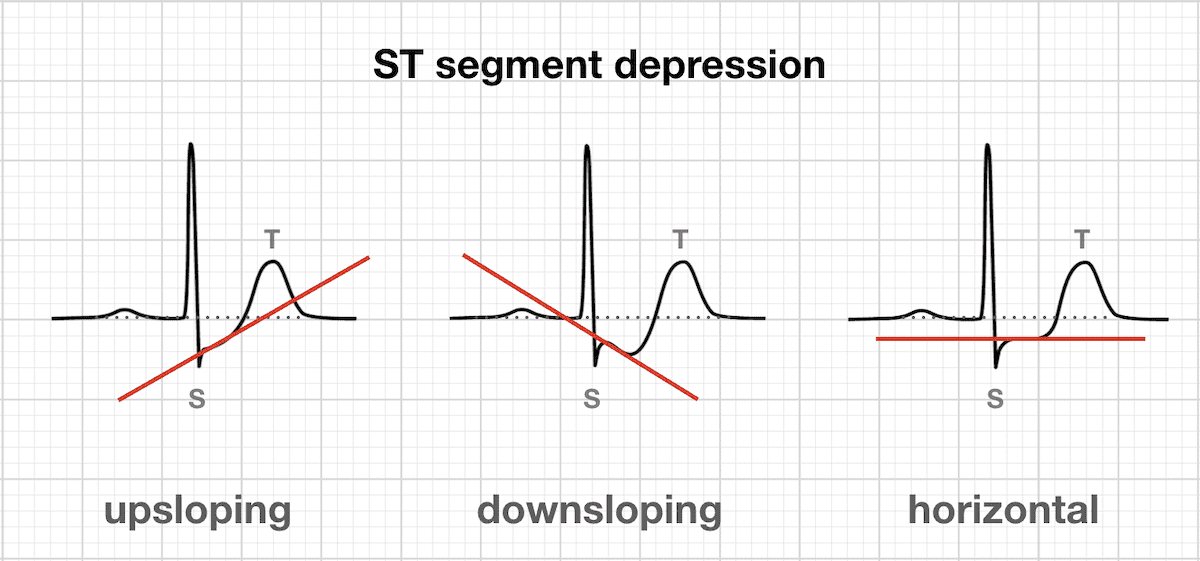

## 2.5 Kayıp Verilerinin Tespiti

In [9]:
print(dt.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


#### Yukarıdaki sonuçlara göre eksik veriler rastlanmamıştır.

## 2.6 Tekrarlayan Verilerin Tespiti


In [10]:
print(dt[dt.duplicated()]) 

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


#### Yukarıdaki sonuçlara göre tekrarlayan veriler rastlanmamıştır.

## 2.7 Korelasyon
### Korelasyon İki değişken arasındaki doğrusal ilişkinin yönü ve gücünü temsil eden değerdir.

In [11]:
import seaborn as sns
corr = dt.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, vmax=1,vmin=-1,center=0,cmap='Spectral')

<AxesSubplot:>

####  Burada Kalp Hastalığı'nın "MaxHR"  ve "Kolesterol"  ile  negatif bir korelasyona sahip olduğunu görebiliriz, ancak Kalp Hastalığı'nın "Oldpeak", "FastingBS" ve "RestingBP" ile pozitif korelasyona sahiptir.

## 2.8 Kategorik Verilerin Sınıflandırılması


#### "Sex","FastingBS","RestingECG","ExcerciseAngina","ST_Slope","ChestPainType" sütunları kategorik olması lazım

In [12]:
dt=pd.get_dummies(dt,columns=["Sex","FastingBS","RestingECG","ExerciseAngina","ST_Slope",'ChestPainType'])
print(dt)

     Age  RestingBP  Cholesterol  MaxHR  Oldpeak  HeartDisease  Sex_F  Sex_M  \
0     40        140          289    172      0.0             0      0      1   
1     49        160          180    156      1.0             1      1      0   
2     37        130          283     98      0.0             0      0      1   
3     48        138          214    108      1.5             1      1      0   
4     54        150          195    122      0.0             0      0      1   
..   ...        ...          ...    ...      ...           ...    ...    ...   
913   45        110          264    132      1.2             1      0      1   
914   68        144          193    141      3.4             1      0      1   
915   57        130          131    115      1.2             1      0      1   
916   57        130          236    174      0.0             1      1      0   
917   38        138          175    173      0.0             0      0      1   

     FastingBS_0  FastingBS_1  ...  Res

## 2.9 Istenen Sütunların X Değişkenine Atanması 


In [13]:
x=dt.drop(["HeartDisease"],axis=1) 
print(x)

     Age  RestingBP  Cholesterol  MaxHR  Oldpeak  Sex_F  Sex_M  FastingBS_0  \
0     40        140          289    172      0.0      0      1            1   
1     49        160          180    156      1.0      1      0            1   
2     37        130          283     98      0.0      0      1            1   
3     48        138          214    108      1.5      1      0            1   
4     54        150          195    122      0.0      0      1            1   
..   ...        ...          ...    ...      ...    ...    ...          ...   
913   45        110          264    132      1.2      0      1            1   
914   68        144          193    141      3.4      0      1            0   
915   57        130          131    115      1.2      0      1            1   
916   57        130          236    174      0.0      1      0            1   
917   38        138          175    173      0.0      0      1            1   

     FastingBS_1  RestingECG_LVH  ...  RestingECG_S

## 2.10 HeartDisease Sütünün Y Değişkenine Atanması

In [14]:
y=dt['HeartDisease']

In [15]:
print(y)

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64


## 2.11 Normalizasyon
#### verileri 0 ve 1 arasında yeniden ölçekler

In [16]:
x_data=(x-np.min(x))/(np.max(x)-np.min(x)) 

## 2.12 Modelin Eğitilmesi


In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y,test_size=0.20,random_state=1)

## 2.13  GP Classifier Modelin ve Kernelin Seçilmesi


### 2.13.1 GP Classifier için kernel çeşitleri

In [89]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
gauss = GaussianProcessClassifier(kernel = 1.0 * RBF(1.0))


## 2.14 Modelin Fit Edilmesi 

In [90]:
gauss.fit(x_train, y_train)

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))

In [91]:
gauss_pred=gauss.predict(x_test)

## 2.15 Modelin Değerlendirilmesi

In [92]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score 
print("GP classifier Accuracy:",metrics.accuracy_score(y_test,gauss_pred))



GP classifier Accuracy: 0.907608695652174


In [93]:
from sklearn.metrics import classification_report

print(classification_report(y_test, gauss_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        74
           1       0.91      0.94      0.92       110

    accuracy                           0.91       184
   macro avg       0.91      0.90      0.90       184
weighted avg       0.91      0.91      0.91       184



In [94]:
import seaborn as sns
cm=confusion_matrix(y_test,gauss_pred)
sns.heatmap(cm/cm.sum(axis=1),annot=True,fmt=".2%",cbar=False,xticklabels=classNames,yticklabels=classNames,cmap="Blues")
plt.show()
classNames=["normal","heartdisease"]
sns.heatmap(cm,annot=True,fmt="",cbar=False,xticklabels=classNames,yticklabels=classNames,cmap='Blues')


<AxesSubplot:>

## 2.16 K-fold CV
####  Bu yöntem ile her defasında bir parça test, diğerleri eğitim veri seti olarak alınıp K defa bu süreç tekrar edilmiştir. bu çalışma içink değeri 5 olarak seçilmiştir.

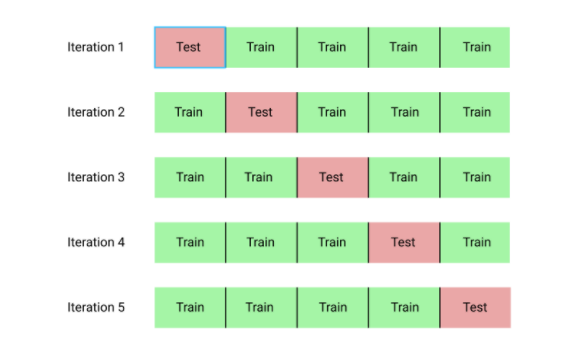

In [95]:
from sklearn.model_selection import cross_val_score
kfcv=cross_val_score(estimator=gauss,X=x,y=y,cv=5)

In [97]:
for i in kfcv:
    print(i)
print("mean value",np.mean(kfcv)) 

0.8152173913043478
0.8804347826086957
0.5543478260869565
0.8360655737704918
0.7814207650273224
mean value 0.7734972677595628


## 2.17 ROC ve AUC eğrileri

#### Çizginin altında kalan alan ne kadar büyükse modelin başarı oranı o kadar yüksek demektir


In [107]:
probs=gauss.predict_proba(x_test)
probs=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,probs)
roc_auc=metrics.auc(fpr,tpr)

In [108]:
plt.plot(fpr,tpr,label="AUC: "+str(round(roc_auc,2)),color="red")
plt.plot([0,1],[0,1],color="blue",linestyle="--",lw="2")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show()

## 2.17 Normalizasyon olmadan 
### sonuçlar normalizasyon hali ile birbirine yakındır.

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
gauss = GaussianProcessClassifier(kernel = 1.0 * RBF(1.0))
gauss.fit(x_train, y_train)
gauss_pred=gauss.predict(x_test)
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score 
print("GP classifier Accuracy:",metrics.accuracy_score(y_test,gauss_pred))




GP classifier Accuracy: 0.8967391304347826


In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, gauss_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        74
           1       0.91      0.92      0.91       110

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184

